# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 04.04.2021


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Bewegung eines Probekörpers um ein nicht-rotierendes schwarzes Loch in der Ebene 
## Teil I: Radialer Fall eines Probekörpers  

Im Folgenden wird die Geodätengleichung in vorgegebener Schwarzschild Raumzeit betrachtet. Die Geodätengleichung beschreibt wie sich ein Probekörper (Masse Probekörper $m << M$ Masse schwarzes Loch) im Raum bewegt und sagt voraus, dass diese Bewegung sich stets entlang der kürzesten Kurve, in der durch die Metrik beschriebenen gekrümmten Raumzeit, vollzieht. Zunächst wird das Python Modul "EinsteinPy" eingebunden, welches auf dem Modul SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht. 

Definition der Koordinaten und der kovarianten Raumzeit-Metrik der Schwarzschildmetrik:
$$ g_{\mu\nu}=\left( \begin{array}{ccc} 1-\frac{2\,M}{r} & 0 & 0 & 0\\ 0&  -\frac{1}{1-\frac{2\,M}{r}}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\end{array} \right)$$


In [1]:
from sympy import *
init_printing()
from einsteinpy.symbolic import *

In [2]:
t, r, theta, phi, M = symbols('t, r, theta, phi, M')
Metric = diag((1-2*M/r), -1/(1-2*M/r), -r**2, -r**2*sin(theta)**2).tolist()
g = MetricTensor(Metric, [t, r, theta, phi])

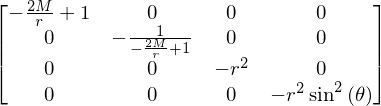

In [3]:
g.tensor()

Die Chistoffel Symbole (zweiter Art): 
$$ \Gamma^{\sigma}_{\mu \nu} = \frac{1}{2}g^{\sigma \alpha} \left( g_{\nu \alpha| \mu} + g_{\mu \alpha| \nu} - g_{\mu \nu| \alpha} \right)$$

Hier speziell $$ \Gamma^{1}_{1 1} = \Gamma^{r}_{r r}$$

ull


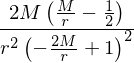

In [4]:
chr = ChristoffelSymbols.from_metric(g)
print(chr.config)
chr.tensor()[1,1,1]

Die Chistoffel Symbole in kovarianter Form (erster Art): 
$$ \Gamma_{\mu \nu \sigma} = \Gamma^{\rho}_{\mu \nu} g_{\rho \sigma} = \frac{1}{2} \left( g_{\nu \sigma| \mu} + g_{\mu \sigma| \nu} - g_{\mu \nu| \sigma} \right)$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

lll


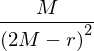

In [5]:
chr_lll = chr.change_config('lll') 
print(chr_lll.config)
chr_lll.tensor()[1,1,1]

Der Riemann Tensor:
$$ R^{\mu}_{\nu \rho \sigma} = \frac{\partial \Gamma^{\mu}_{\nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma^{\mu}_{\nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\nu \sigma}\Gamma^{\mu}_{\rho \alpha} - \Gamma^{\alpha}_{\nu \rho}\Gamma^{\mu}_{\sigma \alpha} $$

Hier speziell $$ R^{0}_{2 0 2} =  R^{t}_{\theta t \theta} $$

ulll


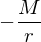

In [6]:
rm = RiemannCurvatureTensor.from_christoffels(chr)
print(rm.config)
rm[0,2,0,2]

Der Ricci Tensor:

$$ R_{\mu \nu} = R^{\sigma}{}\!_{\mu \sigma \nu} = \frac{\partial \Gamma^{\sigma}_{\mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\mu \sigma}}{\partial x^{\nu}} + \Gamma^{\rho}_{\mu \nu}\Gamma^{\sigma}_{\rho \sigma} - \Gamma^{\sigma}_{\mu \rho}\Gamma^{\rho}_{\nu \sigma} $$

ll


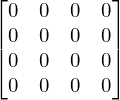

In [7]:
ric = RicciTensor.from_metric(g)
print(ric.config)
ric.simplify()

## Geodätische Bewegung eines Probekörpers

Die Geodätengleichung lässt sich durch folgendes Variationsprinzip herleiten:
$$\int_A^B ds= \int_A^B \sqrt{g_{\mu\nu} dx^\mu dx^\nu}=\int_A^B \sqrt{g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}} d\lambda \rightarrow \hbox{Extremal}$$
, wobei sich dann die Geod&auml;tengleichung mittels der Euler-Lagrange Gleichungen 
$L = \sqrt{g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}}$, bzw. 
 alternativ $L = g_{\mu\nu} \frac{dx^\mu}{d\lambda} \frac{dx^\nu}{d\lambda}$ ergibt:
$$
\frac{d}{d\lambda} \left( \frac{\partial L}{\partial \frac{\partial x^\mu}{\partial \lambda}} \right) - 
    \frac{\partial L}{\partial x^\mu} = 0 \quad \rightarrow \quad \frac{d^2 x^\mu}{d\lambda^2} +  
    \Gamma^\mu_{\nu \rho} \frac{d x^\nu}{d\lambda} \frac{d x^\rho}{d\lambda} ~=~ 0 
$$
$\Gamma^\mu_{\nu \rho}$ sind die Christoffel Symbole zweiter Art und $\lambda$ ein affiner Parameter 
(z.B. die Eigenzeit $\tau$ des Probekörpers). Die Geodätengleichung ist ein System gekoppelter Differentialgleichungen, das wir uns im Folgenden näher betrachten werden.

Wir definieren zunächst den ersten Term der Geodätengleichung $\frac{d^2 x^\mu}{d\tau^2}$:

In [8]:
tau = symbols('tau')
x0 = Function('t')(tau)
x1 = Function('r')(tau)
x2 = Function('\\theta')(tau)
x3 = Function('\\phi')(tau)

In [9]:
xmu=GenericVector([x0, x1, x2, x3],[t, r, theta, phi], config='u',parent_metric=Metric)
xmu.tensor()

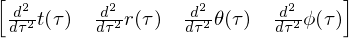

In [10]:
Geod1=diff(xmu.tensor(),tau,tau)
Geod1

und nun den zweiten Term $\Gamma^\mu_{\nu \rho} \frac{d x^\nu}{d\tau} \frac{d x^\rho}{d\tau}$:

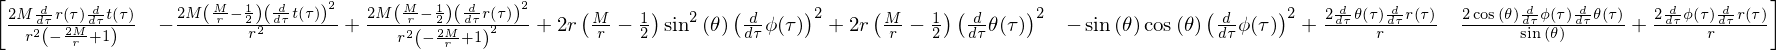

In [11]:
Geod2T=tensorproduct(chr.tensor(),diff(xmu.tensor(),tau),diff(xmu.tensor(),tau))
Geod2=tensorcontraction(Geod2T, (1, 3),(2,4))
Geod2

Die Geodätengleichung ist somit ein System von nichtlinearen gekoppelten Differentialgleichungen zweiter Ordnung. Die entsprechenden vier Gleichungen lauten:

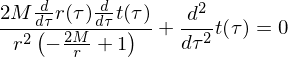

In [12]:
Geod=Geod1+Geod2
GeodEq0=Eq(Geod[0],0)
GeodEq0

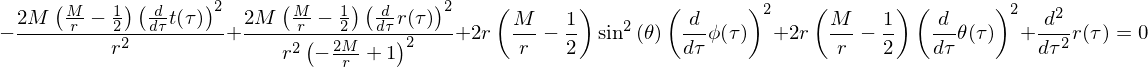

In [13]:
GeodEq1=Eq(Geod[1],0)
GeodEq1

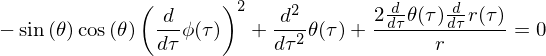

In [14]:
GeodEq2=Eq(Geod[2],0)
GeodEq2

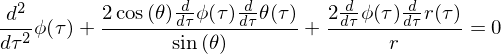

In [15]:
GeodEq3=Eq(Geod[3],0)
GeodEq3

### Radiales Einfallen eines Probekörpers in ein schwarzes Loch

Wir lassen im Folgenden nur ebene Bewegungen zu ($\theta=\frac{\pi}{2}, {\rm cos}(\theta)=0, {\rm sin}(\theta)=1, \frac{d \theta}{d\tau}=0, \frac{d^2 \theta}{d\tau^2}=0$) und beschränken uns zusätzlich auf ein radial in das schwarze Loch einfallenden Probekörper ($\frac{d \phi}{d\tau}=0, \frac{d^2 \phi}{d\tau^2}=0$). Unter diesen Annahmen sind nur die ersten beiden Geodätengleichungen relevant und diese lauten dann:

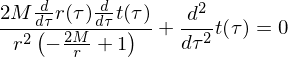

In [16]:
GeodEq0=GeodEq0.subs({(theta,pi/2),(diff(x2,tau),0),(diff(x3,tau),0)})
GeodEq0

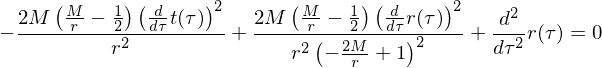

In [17]:
GeodEq1=GeodEq1.subs({(theta,pi/2),(diff(x2,tau),0),(diff(x3,tau),0)})
GeodEq1

Um dieses System von zwei Differentialgleichungen zweiter Ordnung mit Python nummerisch lösen zu können, müssen wir es zunächst in ein System von vier Differentialgleichungen erster Ordnung umschreiben. Wir definieren dazu formal: $y_1=\frac{dt}{d\tau}$, $y_2=\frac{dr}{d\tau}$, $y_3=\frac{dy_1}{d\tau}=\frac{d^2t}{d\tau^2}$ und $y_4=\frac{dy_2}{d\tau}=\frac{d^2r}{d\tau^2}$. Wir legen des Weiteren die Masse des schwarzen Loches auf $M=1$ fest.

In [18]:
y1, y2 = symbols('y_1, y_2')

In [19]:
F0=solve(GeodEq0,diff(x0,tau,tau))[0]
F1=solve(GeodEq1,diff(x1,tau,tau))[0]

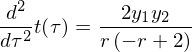

In [20]:
Eq(diff(x0,tau,tau),F0.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(M,1)}))

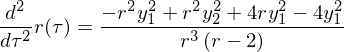

In [21]:
Eq(diff(x1,tau,tau),F1.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(M,1)}))

In [22]:
y3=lambdify((r,y1,y2), F0.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(M,1)}))

In [23]:
y4=lambdify((r,y1,y2), F1.subs({(diff(x0,tau),y1),(diff(x1,tau),y2),(M,1)}))

Wir definieren das System der gekoppelten vier Differentialgleichungen:

In [24]:
def DGLsys(vy, time):
    t, r, y1, y2 = vy
    dt = y1
    dr = y2
    dy1 = y3(r,y1,y2)
    dy2 = y4(r,y1,y2)
    return np.array([dt,dr,dy1,dy2])

Zum Vergleich lösen wir auch die Bewegungsgleichung nach Newton: 

$$\frac{d^2r}{dt^2}=-\frac{1}{r^2}$$

In [25]:
def DGLsysNewton(vy, time):
    r, y2 = vy
    dr = y2
    dy2 = -1/r**2
    return np.array([dr,dy2])

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

In Abhängigkeit von den Anfangswerten können unterschiedliche Bahnen der Bewegung entstehen. Wir wählen zunächst als Beispiel die Anfangswerte eines Probekörpers, der sich zur Zeit $t=\tau=0$ bei einem Radius von $r_0=10=5 R_S$ befindet und eine Anfangsgeschwindigkeit in radialer Richtung von $\left. \frac{dr}{d\tau} \right|_{\tau=0}=0$ hat. Die weitere nötige Anfangsbedingung ( $\left. \frac{dt}{d\tau} \right|_{\tau=0}$ ) erhalten wir mittels der Bedingung $\left( \frac{ds}{d\tau} \right)^2= g_{\mu\nu} \frac{dx^\mu}{d\tau} \frac{dx^\nu}{d\tau} = g_{\mu\nu} u^\mu u^\nu = 1$, die für massive Probekörper immer erfüllt sein muss ($u^\mu$ ist die Vierergeschwindigkeit des Probekörpers). Wir beschreiben die Bewegung aus der Sichtweise eines im Unendlichen ruhenden Beobachters (Schwarzschild Koordinaten). 

In [27]:
tval = np.linspace(0, 33.7, 10001)
tvalNewton = np.linspace(0, 35.12, 10001)

t0=0.0
r0=10.0
dr0=0.0
dt0=1/np.sqrt(1-2/r0)

initialval = np.array([t0,r0,dt0,dr0])
initialvalNewton = np.array([r0,dr0])

Loes = integrate.odeint(DGLsys, initialval, tval)
LoesNewton = integrate.odeint(DGLsysNewton, initialvalNewton, tvalNewton)

In [28]:
params = {
    'figure.figsize'    : [10,8],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

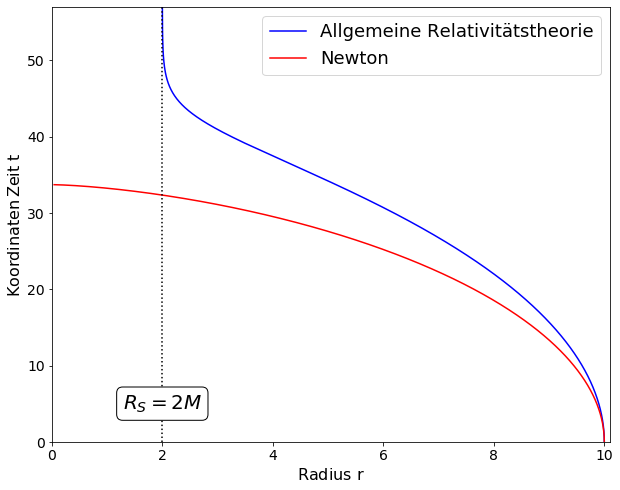

In [29]:
plt.cla()
plt.ylabel(r"$\rm Koordinaten \, Zeit \,\,t$")
plt.xlabel(r"$\rm Radius \,\,r$")
plt.xlim(0,10.1)
plt.ylim(0,57)


plt.plot(Loes[:, 1],Loes[:, 0],c="blue", linewidth=1.5, linestyle='-',label="Allgemeine Relativitätstheorie");
plt.plot(LoesNewton[:, 0],tval,c="red", linewidth=1.5, linestyle='-',label="Newton");
plt.legend(loc='upper right', fontsize=18)

plt.axvline(x=2, linewidth=1.5, color="black", linestyle=':')
plt.text(2, 5, r"$R_S=2M$", size=20, rotation=0.,ha="center", va="center",
         bbox=dict(boxstyle="round",ec="black",fc="white"));

Der in das schwarze Loch fallende Probekörpers bleibt somit, für einen äußeren Beobachter, anscheinend am Ereignishorizont bei $R_S=2M$ stehen (siehe die blaue Kurve im oberen Raumzeitdiagramm). Seine Bewegung in radialer Richtung wird nahe dem Ereignishorizont immer langsamer und das Bild, welches ein äußerer Beobachter wahrnimmt, friert am Ereignishorizont ein. Man kann zeigen, dass das wahrgenommene Bild gleichzeitig unendlich rotverschoben wird, sodass es nahe dem Ereignishorizont, langsam den wahrnehmbaren, sichtbaren Bereich verlässt. Eine gute, pädagogische Verbildlichung dieser und weiterer seltsamen Eigenschaften von schwarzen Löchern spiegelt sich in der speziellen architektonischen Konstruktion des Berliner Reichstagsgebäudes wider (siehe <A href="https://itp.uni-frankfurt.de/~hanauske/new/LateralThougts.html" target="_blank">Black Holes and the German Reichstag</A>).

Die untere Abbildung veranschaulicht zusätzlich zur Lösung des radialen Falls des Probekörpers einige radial nach Außen gesendete Lichtstralen (gepunktete rote Kurven).

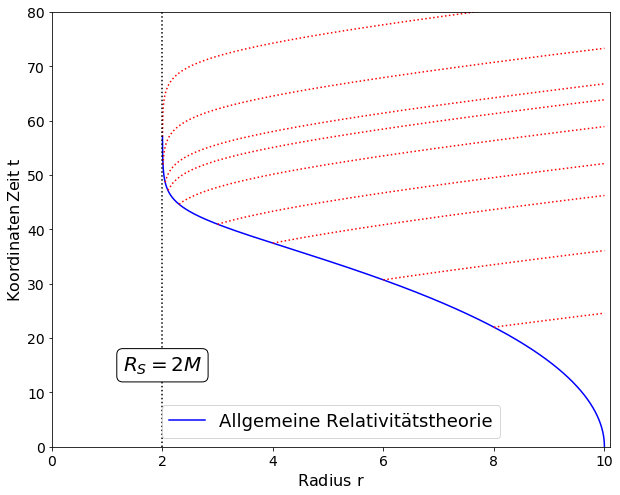

In [30]:
plt.cla()
plt.ylabel(r"$\rm Koordinaten \, Zeit \,\,t$")
plt.xlabel(r"$\rm Radius \,\,r$")
plt.xlim(0,10.1)
plt.ylim(0,80)

plt.plot(Loes[:, 1],Loes[:, 0],c="blue", linewidth=1.5, linestyle='-',label="Allgemeine Relativitätstheorie");

pos=8
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=6
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=4
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=3
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=2.3
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=2.1
rval = np.linspace(pos, 10, 100)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=2.05
rval = np.linspace(pos, 10, 1000)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=2.01
rval = np.linspace(pos, 10, 1000)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
pos=2.001
rval = np.linspace(pos, 10, 1000)
it=np.where(Loes[:, 1]<pos)
PhotonOut=2*np.log(np.abs(rval-2))+rval -(2*np.log(np.abs(pos-2))+pos)+Loes[it[0][0], 0]
plt.plot(rval,PhotonOut,c="red", linewidth=1.5, linestyle=':');
plt.legend(loc='lower center', fontsize=18)

plt.axvline(x=2, linewidth=1.5, color="black", linestyle=':')
plt.text(2, 15, r"$R_S=2M$", size=20, rotation=0.,ha="center", va="center",
         bbox=dict(boxstyle="round",ec="black",fc="white"));